In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.model_selection import train_test_split

In [2]:
# Importing training data

train_data1 = np.load('../DL-Project/data0.npy')
train_lab1 = np.load('../DL-Project/lab0.npy')

train_data2 = np.load('../DL-Project/data1.npy')
train_lab2 = np.load('../DL-Project/lab1.npy')

train_data3 = np.load('../DL-Project/data2.npy')
train_lab3 = np.load('../DL-Project/lab2.npy')


In [3]:
# Preprocessing - normalizing the image and adding new dimension for convolutions

images = np.concatenate((train_data1, train_data2, train_data3)) / 255
labels = np.concatenate((train_lab1, train_lab2, train_lab3))

images = images[:, np.newaxis, :, :]

In [4]:
np.shape(images[0])

(1, 40, 168)

In [5]:
# Splitting the dataset into train, validate and test sets

train_images, temp_images, train_labels, temp_labels = train_test_split(
    images, labels, test_size=0.2, random_state=100
)
val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=0.5, random_state=100
)

In [6]:
# Converting the sets to pytorch compatible tensors

train_images = torch.tensor(train_images, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.float32)
val_images = torch.tensor(val_images, dtype=torch.float32)
val_labels = torch.tensor(val_labels, dtype=torch.float32)
test_images = torch.tensor(test_images, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.float32)

In [7]:
# Creating the Datasets from the tensors

class ImageDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

train_dataset = ImageDataset(train_images, train_labels)
val_dataset = ImageDataset(val_images, val_labels)
test_dataset = ImageDataset(test_images, test_labels)

# Creating DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [9]:
# Choosing GPU for training

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [10]:
for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)
    labels = labels.unsqueeze(1)  # Match output shape
    print(np.shape(images[0]))
    # optimizer.zero_grad()
    # outputs = model(images)
    # loss = criterion(outputs, labels)
    # loss.backward()
    # optimizer.step()
    # train_loss += loss.item()

torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])
torch.Size([1, 40, 168])


In [9]:
# Defining the model and moving it to the gpu

class CNNRegressor(nn.Module):
    def __init__(self):
        super(CNNRegressor, self).__init__()
        self.conv_layers = nn.Sequential(
            # Convolution layer 1
            nn.Conv2d(1, 10, kernel_size=28, stride=1, padding=14),  # (N, 10, 40, 168)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (N, 10, 20, 84)
            # Convolution layer 2
            nn.Conv2d(10, 16, kernel_size=3, stride=1, padding=1),  # (N, 16, 20, 84)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (N, 16, 10, 42)
            # Convolution layer 3
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),  # (N, 32, 10, 42)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (N, 32, 5, 21)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            # Fully connected layer 1
            nn.Linear(32 * 5 * 21, 256),
            nn.ReLU(),
            # Fully connected layer 1
            nn.Linear(256, 32),
            nn.ReLU(),
            # Fully connected layer 1
            nn.Linear(32, 4),
            nn.ReLU(),
            # Final layer for output
            nn.Linear(4, 1)  # Regression output
        )

    def forward(self, x):
        # Running the convolution layers
        x = self.conv_layers(x)
        # Running the fully connected layers
        x = self.fc_layers(x)
        return x

model = CNNRegressor().to(device)

In [10]:
# Defining Loss and Optimizer
criterion = nn.L1Loss() # L1 loss is the mean absolute error
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [11]:
# TQDM to keep track of the training
from tqdm import tqdm

In [12]:
# Defining the training Loop

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    train_losses = []
    validation_losses = []
    
    for epoch in tqdm(range(epochs)):
        
        model.train()
        train_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.unsqueeze(1)  # Match output shape
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        val_loss = 0
        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                labels = labels.unsqueeze(1)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        train_losses.append(train_loss/len(train_loader))
        validation_losses.append(val_loss/len(val_loader))
        
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {validation_losses[-1]:.4f}")

    return (train_losses, validation_losses)


In [13]:
# Training the model for 40 epochs

train_losses, validation_losses = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=40)

  2%|█▍                                                         | 1/40 [01:23<54:29, 83.83s/it]

Epoch 1/40, Train Loss: 4.8815, Val Loss: 3.6848


  5%|██▉                                                        | 2/40 [02:48<53:15, 84.10s/it]

Epoch 2/40, Train Loss: 3.0809, Val Loss: 3.0221


  8%|████▍                                                      | 3/40 [04:12<51:55, 84.20s/it]

Epoch 3/40, Train Loss: 2.5153, Val Loss: 2.2906


 10%|█████▉                                                     | 4/40 [05:37<50:40, 84.45s/it]

Epoch 4/40, Train Loss: 2.2945, Val Loss: 2.4999


 12%|███████▍                                                   | 5/40 [07:02<49:22, 84.64s/it]

Epoch 5/40, Train Loss: 2.1853, Val Loss: 2.0352


 15%|████████▊                                                  | 6/40 [08:27<48:01, 84.75s/it]

Epoch 6/40, Train Loss: 2.0688, Val Loss: 2.0506


 18%|██████████▎                                                | 7/40 [09:52<46:39, 84.82s/it]

Epoch 7/40, Train Loss: 1.9967, Val Loss: 1.9341


 20%|███████████▊                                               | 8/40 [11:17<45:15, 84.87s/it]

Epoch 8/40, Train Loss: 1.9265, Val Loss: 1.9379


 22%|█████████████▎                                             | 9/40 [12:42<43:51, 84.89s/it]

Epoch 9/40, Train Loss: 1.8816, Val Loss: 2.2427


 25%|██████████████▌                                           | 10/40 [14:07<42:27, 84.91s/it]

Epoch 10/40, Train Loss: 1.8347, Val Loss: 1.8282


 28%|███████████████▉                                          | 11/40 [15:31<41:02, 84.91s/it]

Epoch 11/40, Train Loss: 1.7849, Val Loss: 2.2398


 30%|█████████████████▍                                        | 12/40 [16:56<39:37, 84.91s/it]

Epoch 12/40, Train Loss: 1.7779, Val Loss: 1.8750


 32%|██████████████████▊                                       | 13/40 [18:21<38:12, 84.90s/it]

Epoch 13/40, Train Loss: 1.7026, Val Loss: 2.3728


 35%|████████████████████▎                                     | 14/40 [19:46<36:47, 84.90s/it]

Epoch 14/40, Train Loss: 1.6998, Val Loss: 1.8550


 38%|█████████████████████▊                                    | 15/40 [21:11<35:22, 84.88s/it]

Epoch 15/40, Train Loss: 1.6687, Val Loss: 1.7916


 40%|███████████████████████▏                                  | 16/40 [22:36<33:56, 84.87s/it]

Epoch 16/40, Train Loss: 1.6245, Val Loss: 1.7898


 42%|████████████████████████▋                                 | 17/40 [24:01<32:31, 84.86s/it]

Epoch 17/40, Train Loss: 1.5986, Val Loss: 1.8041


 45%|██████████████████████████                                | 18/40 [25:26<31:06, 84.86s/it]

Epoch 18/40, Train Loss: 1.5871, Val Loss: 1.9644


 48%|███████████████████████████▌                              | 19/40 [26:50<29:41, 84.85s/it]

Epoch 19/40, Train Loss: 1.5295, Val Loss: 1.9555


 50%|█████████████████████████████                             | 20/40 [28:15<28:17, 84.86s/it]

Epoch 20/40, Train Loss: 1.5333, Val Loss: 1.7625


 52%|██████████████████████████████▍                           | 21/40 [29:40<26:52, 84.86s/it]

Epoch 21/40, Train Loss: 1.5160, Val Loss: 1.7547


 55%|███████████████████████████████▉                          | 22/40 [31:05<25:27, 84.86s/it]

Epoch 22/40, Train Loss: 1.4919, Val Loss: 1.7347


 57%|█████████████████████████████████▎                        | 23/40 [32:30<24:03, 84.89s/it]

Epoch 23/40, Train Loss: 1.4819, Val Loss: 1.8434


 60%|██████████████████████████████████▊                       | 24/40 [33:55<22:38, 84.93s/it]

Epoch 24/40, Train Loss: 1.4396, Val Loss: 1.8529


 62%|████████████████████████████████████▎                     | 25/40 [35:20<21:14, 84.95s/it]

Epoch 25/40, Train Loss: 1.4446, Val Loss: 1.7973


 65%|█████████████████████████████████████▋                    | 26/40 [36:45<19:49, 84.97s/it]

Epoch 26/40, Train Loss: 1.4081, Val Loss: 1.7345


 68%|███████████████████████████████████████▏                  | 27/40 [38:10<18:24, 84.98s/it]

Epoch 27/40, Train Loss: 1.3875, Val Loss: 1.7962


 70%|████████████████████████████████████████▌                 | 28/40 [39:35<16:59, 84.98s/it]

Epoch 28/40, Train Loss: 1.3946, Val Loss: 2.1076


 72%|██████████████████████████████████████████                | 29/40 [41:00<15:34, 84.99s/it]

Epoch 29/40, Train Loss: 1.3616, Val Loss: 1.7861


 75%|███████████████████████████████████████████▌              | 30/40 [42:25<14:09, 84.99s/it]

Epoch 30/40, Train Loss: 1.3352, Val Loss: 1.7444


 78%|████████████████████████████████████████████▉             | 31/40 [43:50<12:44, 84.99s/it]

Epoch 31/40, Train Loss: 1.3246, Val Loss: 1.8825


 80%|██████████████████████████████████████████████▍           | 32/40 [45:15<11:19, 84.99s/it]

Epoch 32/40, Train Loss: 1.3115, Val Loss: 1.7500


 82%|███████████████████████████████████████████████▊          | 33/40 [46:40<09:55, 85.00s/it]

Epoch 33/40, Train Loss: 1.2973, Val Loss: 1.8125


 85%|█████████████████████████████████████████████████▎        | 34/40 [48:05<08:29, 85.00s/it]

Epoch 34/40, Train Loss: 1.2890, Val Loss: 1.7293


 88%|██████████████████████████████████████████████████▊       | 35/40 [49:30<07:04, 84.99s/it]

Epoch 35/40, Train Loss: 1.2522, Val Loss: 1.7686


 90%|████████████████████████████████████████████████████▏     | 36/40 [50:55<05:40, 85.00s/it]

Epoch 36/40, Train Loss: 1.2458, Val Loss: 1.7728


 92%|█████████████████████████████████████████████████████▋    | 37/40 [52:20<04:14, 84.99s/it]

Epoch 37/40, Train Loss: 1.2457, Val Loss: 1.7887


 95%|███████████████████████████████████████████████████████   | 38/40 [53:45<02:49, 84.99s/it]

Epoch 38/40, Train Loss: 1.2172, Val Loss: 1.7775


 98%|████████████████████████████████████████████████████████▌ | 39/40 [55:10<01:24, 84.98s/it]

Epoch 39/40, Train Loss: 1.2176, Val Loss: 1.7739


100%|██████████████████████████████████████████████████████████| 40/40 [56:35<00:00, 84.88s/it]

Epoch 40/40, Train Loss: 1.1921, Val Loss: 1.8110


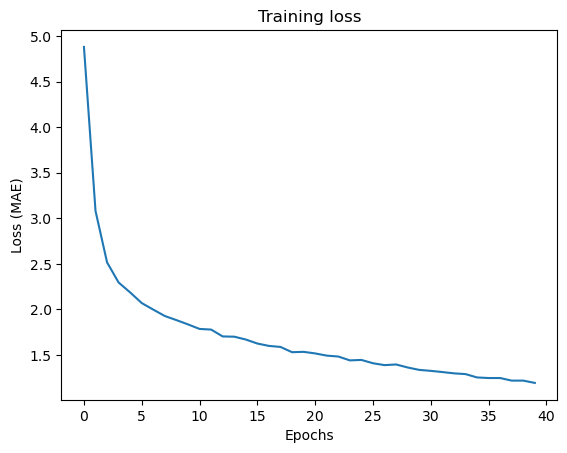

In [14]:
plt.plot(train_losses)
plt.xlabel("Epochs")
plt.ylabel("Loss (MAE)")
plt.title("Training loss")
plt.show()

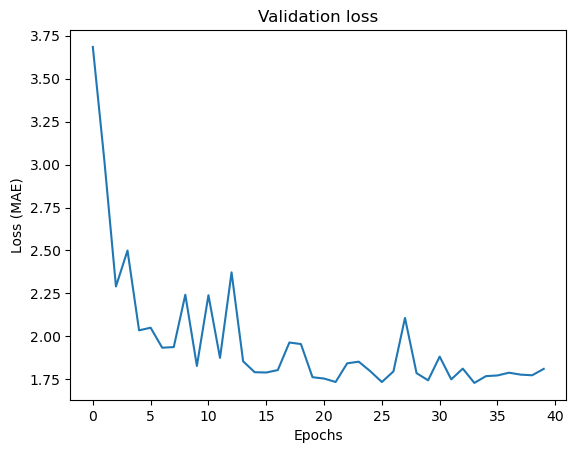

In [15]:
plt.plot(validation_losses)
plt.xlabel("Epochs")
plt.ylabel("Loss (MAE)")
plt.title("Validation loss")
plt.show()

In [16]:
# Save the model

torch.save(model.state_dict(), "model.pth")

In [17]:
# Testing the Model on the test dataset

def evaluate_model(model, test_loader):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    print(f"Test Loss: {test_loss/len(test_loader):.4f}")
    return [labels, outputs]

l,o = evaluate_model(model, test_loader)


Test Loss: 1.7951


In [18]:
# A set of the predicted values for comparison

print("Actual\t:\tPredicted\t:\tDiffrence")
for el in range(len(l)):
    print(float(l[el][0]), "\t:\t", float(o[el][0]), "\t:\t", float(o[el][0] - l[el][0]))

Actual	:	Predicted	:	Diffrence
13.0 	:	 12.023143768310547 	:	 -0.9768562316894531
8.0 	:	 7.0523881912231445 	:	 -0.9476118087768555
22.0 	:	 23.7950496673584 	:	 1.7950496673583984
11.0 	:	 10.127303123474121 	:	 -0.8726968765258789
15.0 	:	 14.909523963928223 	:	 -0.09047603607177734
19.0 	:	 19.951597213745117 	:	 0.9515972137451172
18.0 	:	 18.037399291992188 	:	 0.0373992919921875
15.0 	:	 15.052903175354004 	:	 0.052903175354003906
14.0 	:	 15.035238265991211 	:	 1.035238265991211
28.0 	:	 30.039779663085938 	:	 2.0397796630859375
12.0 	:	 12.84731388092041 	:	 0.8473138809204102
16.0 	:	 16.27943229675293 	:	 0.2794322967529297
23.0 	:	 21.265348434448242 	:	 -1.7346515655517578
23.0 	:	 24.823923110961914 	:	 1.823923110961914
15.0 	:	 16.493295669555664 	:	 1.493295669555664
17.0 	:	 16.891489028930664 	:	 -0.10851097106933594
12.0 	:	 14.995077133178711 	:	 2.995077133178711
30.0 	:	 30.147348403930664 	:	 0.14734840393066406
15.0 	:	 16.670658111572266 	:	 1.670658111572265

In [ ]:
# Defining the Classification model, loading it and moving it to the gpu

class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNRegressor, self).__init__()
        self.conv_layers = nn.Sequential(
            # Convolution layer 1
            nn.Conv2d(1, 10, kernel_size=28, stride=1, padding=14),  # (N, 10, 40, 168)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (N, 10, 20, 84)
            # Convolution layer 2
            nn.Conv2d(10, 16, kernel_size=3, stride=1, padding=1),  # (N, 16, 20, 84)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (N, 16, 10, 42)
            # Convolution layer 3
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),  # (N, 32, 10, 42)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (N, 32, 5, 21)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            # Fully connected layer 1
            nn.Linear(32 * 5 * 21, 256),
            nn.ReLU(),
            # Fully connected layer 2
            nn.Linear(256, 40),
        )

    def forward(self, x):
        # Running the convolution layers
        x = self.conv_layers(x)
        # Running the fully connected layers
        x = self.fc_layers(x)
        return x

model = CNNClassifier().to(device)
model.load_state_dict(torch.load('model.pth', weights_only=True))